In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [66]:

data = pd.read_csv('lecture.csv')
data_na = data['value'].isnull()

test = data[data_na]
test_id = test.순번
test.drop(['순번','lecture','professor','value'],axis='columns', inplace=True)

train = data[~data_na]
train_id = train.순번
train_y = train.value
train.drop(['순번','lecture','professor','value'],axis='columns', inplace=True)

print(data)

        순번                        lecture          professor  과제 많음  과제 보통  \
0    10001                  4차 산업혁명과 융합기술                이응석      0      0   
1    10002  4차산업/직업과 인체 뇌 기능의 생활 응용 융합 강좌  김영철, 김진하, 김찬형, 최웅      0      0   
2    10003                       갈등사회와 시민      김남준, 김민재, 조일수      0      1   
3    10004                          결혼과가족                김영희      0      1   
4    10005                          결혼과가족                김대광      0      1   
..     ...                            ...                ...    ...    ...   
207  10208                    현대산업사회와환경문제                 윤철      0      1   
208  10209                    현대산업사회와환경문제                김광열      0      0   
209  10210                      현대정치와국제관계                정태일      0      1   
210  10211                   환경과 곤충산업의 이해                김재용      0      0   
211  10212                  환경과 그린에너지의 이해                김재용      0      0   

     과제 없음  조모임 많음  조모임 보통  조모임 없음  학점 느님  ...  시험 한 번  시험 없음  

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## 데이터를 기반으로 평점 평균, 리뷰 수와 평점에 대한 분포

In [47]:
print(data[["value",'리뷰 수']].describe())

            value        리뷰 수
count  182.000000  212.000000
mean     3.968901   38.377358
std      0.829916   57.323139
min      1.400000    1.000000
25%      3.405000    4.000000
50%      4.110000   15.000000
75%      4.647500   43.500000
max      5.000000  245.000000


<Figure size 432x288 with 0 Axes>

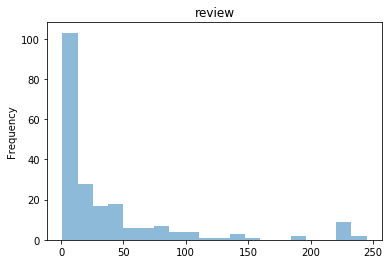

In [43]:
fig= plt.figure()
fig,ax = plt.subplots()
ax.set_title("review")
data['리뷰 수'].plot.hist(alpha=0.5,bins=20,ax=ax)

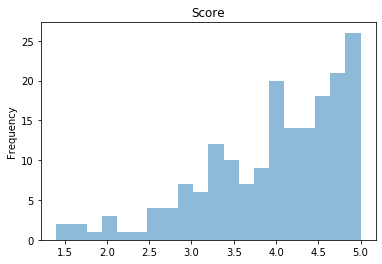

In [44]:
fig,ax = plt.subplots()
ax.set_title("Score")
data['value'].plot.hist(alpha=0.5,bins=20,ax=ax)

In [74]:
data.groupby(data['리뷰 수']).mean()

,순번,과제 많음,과제 보통,과제 없음,조모임 많음,조모임 보통,조모임 없음,학점 느님,학점 비율채워줌,학점 깐깐함,...,시험 두 번,시험 한 번,시험 없음,pass/fail,grade,객관식,주관식,프로젝트 있음,암기 많음,value
리뷰 수,,,,,,,,,,,,,,,,,,,,,
1,10103.450000,0.025000,0.150000,0.075000,0.000000,0.050000,0.200000,0.150000,0.100000,0.000000,...,0.050000,0.100000,0.100000,0.0,0.25,0.0,0.0,0.0,0.0,4.400000
2,10112.285714,0.000000,0.571429,0.428571,0.000000,0.142857,0.857143,0.285714,0.714286,0.000000,...,0.571429,0.285714,0.142857,0.0,1.00,0.0,0.0,0.0,0.0,4.428571
3,10083.400000,0.200000,0.400000,0.400000,0.000000,0.200000,0.800000,0.800000,0.200000,0.000000,...,0.200000,0.200000,0.600000,0.0,1.00,0.0,0.0,0.0,0.0,4.366000
4,10106.000000,0.142857,0.142857,0.714286,0.000000,0.000000,1.000000,0.428571,0.571429,0.000000,...,0.000000,0.714286,0.285714,0.0,1.00,0.0,0.0,0.0,0.0,3.868571
5,10084.166667,0.166667,0.666667,0.166667,0.166667,0.166667,0.666667,0.333333,0.333333,0.333333,...,0.500000,0.500000,0.000000,0.0,1.00,0.0,0.0,0.0,0.0,3.771667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,10176.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,1.00,0.0,0.0,0.0,0.0,3.740000
185,10188.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,1.00,0.0,0.0,0.0,0.0,3.290000
190,10076.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.0,1.00,0.0,0.0,0.0,0.0,3.870000


## 머신러닝 & 그래프

In [52]:
alg = LinearRegression()
alg.fit(train, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_pred = alg.predict(test)
print(y_pred)
#accuracy_score(Y_test, y_pred, normalize=True)

[3.2529758 3.2529758 3.2529758 3.2529758 3.2529758 3.2529758 3.2529758
 3.2529758 3.2529758 3.2529758 3.2529758 3.2529758 3.2529758 3.2529758
 3.2529758 3.2529758 3.2529758 3.2529758 3.2529758 3.2529758 3.2529758
 3.2529758 3.2529758 3.2529758 3.2529758 3.2529758 3.2529758 3.2529758
 3.2529758 3.2529758]


In [54]:
importance = alg.coef_

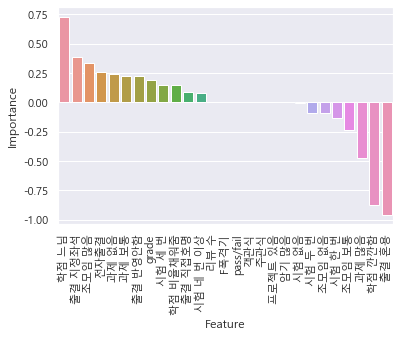

In [64]:
feature_imp = pd.DataFrame(sorted(zip(train.columns, importance), key=lambda k: k[1], reverse=True))
feature_imp.columns = ['Feature', 'Importance']
import matplotlib.font_manager as fm
 
plt.rc('font', family='Malgun Gothic')

plt.xticks(rotation=90)
sns.set(rc={"axes.unicode_minus":False})
sns.barplot(data=feature_imp, x='Feature', y='Importance')